In [14]:
# PROJECT PROGRESS 3: EXPLORATORY DATA ANALYSIS (EDA)
# Requirements: Descriptive Stats, Grouping, ANOVA, Correlation Heatmap

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [16]:
df = pd.read_csv('C:\\Python\\ObesityDataSet_raw_and_data_sinthetic.csv')
df = df.dropna()
# Rename ALL columns to be readable
df.rename(columns={
    'FAVC': 'HighCaloricFood',
    'FCVC': 'VegConsumption',       # Frequency of consumption of vegetables
    'NCP': 'MealsPerDay',           # Number of main meals
    'CAEC': 'SnackFood',            # Consumption of food between meals
    'CH2O': 'WaterIntake',          # Consumption of water daily
    'SCC': 'MonitorCalories',       # Calories consumption monitoring
    'FAF': 'PhysicalActivity',      # Physical activity frequency
    'TUE': 'TechUseTime',           # Time using technology devices
    'CALC': 'Alcohol',              # Consumption of alcohol
    'MTRANS': 'Transportation',     # Transportation used
    'NObeyesdad': 'ObesityLevel'    # Target Variable
}, inplace=True)

# Quick check to see the new names
print(df.columns)

# Create a copy for the Correlation Heatmap (needs numbers, not words)
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

Index(['Age', 'Gender', 'Height', 'Weight', 'Alcohol', 'HighCaloricFood',
       'VegConsumption', 'MealsPerDay', 'MonitorCalories', 'SMOKE',
       'WaterIntake', 'family_history_with_overweight', 'PhysicalActivity',
       'TechUseTime', 'SnackFood', 'Transportation', 'ObesityLevel'],
      dtype='object')


In [17]:
# DESCRIPTIVE STATISTICS
# Generates Mean, Min, Max, Std Dev for numerical columns

# We use the NEW names: VegConsumption, WaterIntake, PhysicalActivity
desc_stats = df[['Age', 'Height', 'Weight', 'VegConsumption', 'WaterIntake', 'PhysicalActivity']].describe().round(2)

print(desc_stats)

           Age   Height   Weight  VegConsumption  WaterIntake  \
count  2111.00  2111.00  2111.00         2111.00      2111.00   
mean     24.31     1.70    86.59            2.42         2.01   
std       6.35     0.09    26.19            0.53         0.61   
min      14.00     1.45    39.00            1.00         1.00   
25%      19.95     1.63    65.47            2.00         1.58   
50%      22.78     1.70    83.00            2.39         2.00   
75%      26.00     1.77   107.43            3.00         2.48   
max      61.00     1.98   173.00            3.00         3.00   

       PhysicalActivity  
count           2111.00  
mean               1.01  
std                0.85  
min                0.00  
25%                0.12  
50%                1.00  
75%                1.67  
max                3.00  


In [18]:
# GROUPING ANALYSIS
# Question: Does eating high caloric food (Yes/No) affect average weight?
group_stat = df.groupby('HighCaloricFood')['Weight'].mean()
print("Average Weight based on High Caloric Food Consumption:")
print(group_stat)

Average Weight based on High Caloric Food Consumption:
HighCaloricFood
no     66.908408
yes    89.169672
Name: Weight, dtype: float64


In [20]:
# HYPOTHESIS TESTING (ANOVA)
# Note: Using the NEW column names (Transportation, SnackFood, Alcohol)

# TEST 1: Does 'Transportation' (Car vs Walk vs Bus) significantly change 'Weight'?
groups = [df[df['Transportation'] == t]['Weight'] for t in df['Transportation'].unique()]
f_val, p_val = stats.f_oneway(*groups)

print(f"\n1. Test: Transportation vs Weight")
print(f"   F-Value: {f_val:.2f}")
print(f"   P-Value: {p_val:.5e}")

if p_val < 0.05:
    print("   >> RESULT: Statistically Significant (Transportation affects Weight).")
else:
    print("   >> RESULT: Not Significant.")

# TEST 2: Snacking Habits (SnackFood) vs Weight
groups_caec = [df[df['SnackFood'] == t]['Weight'] for t in df['SnackFood'].unique()]
f_val_caec, p_val_caec = stats.f_oneway(*groups_caec)

print(f"\n2. Test: Snacking Habits (SnackFood) vs Weight")
print(f"   F-Value: {f_val_caec:.2f}")
print(f"   P-Value: {p_val_caec:.5e}")

if p_val_caec < 0.05:
    print("   >> RESULT: Significant! Snacking frequency affects Weight.")
else:
    print("   >> RESULT: Not Significant.")

# TEST 3: Alcohol Consumption (Alcohol) vs Weight
groups_calc = [df[df['Alcohol'] == t]['Weight'] for t in df['Alcohol'].unique()]
f_val_calc, p_val_calc = stats.f_oneway(*groups_calc)

print(f"\n3. Test: Alcohol Consumption vs Weight")
print(f"   F-Value: {f_val_calc:.2f}")
print(f"   P-Value: {p_val_calc:.5e}")

if p_val_calc < 0.05:
    print("   >> RESULT: Significant! Alcohol consumption affects Weight.")
else:
    print("   >> RESULT: Not Significant.")


1. Test: Transportation vs Weight
   F-Value: 6.81
   P-Value: 1.89979e-05
   >> RESULT: Statistically Significant (Transportation affects Weight).

2. Test: Snacking Habits (SnackFood) vs Weight
   F-Value: 149.91
   P-Value: 4.72576e-88
   >> RESULT: Significant! Snacking frequency affects Weight.

3. Test: Alcohol Consumption vs Weight
   F-Value: 51.40
   P-Value: 4.64137e-32
   >> RESULT: Significant! Alcohol consumption affects Weight.


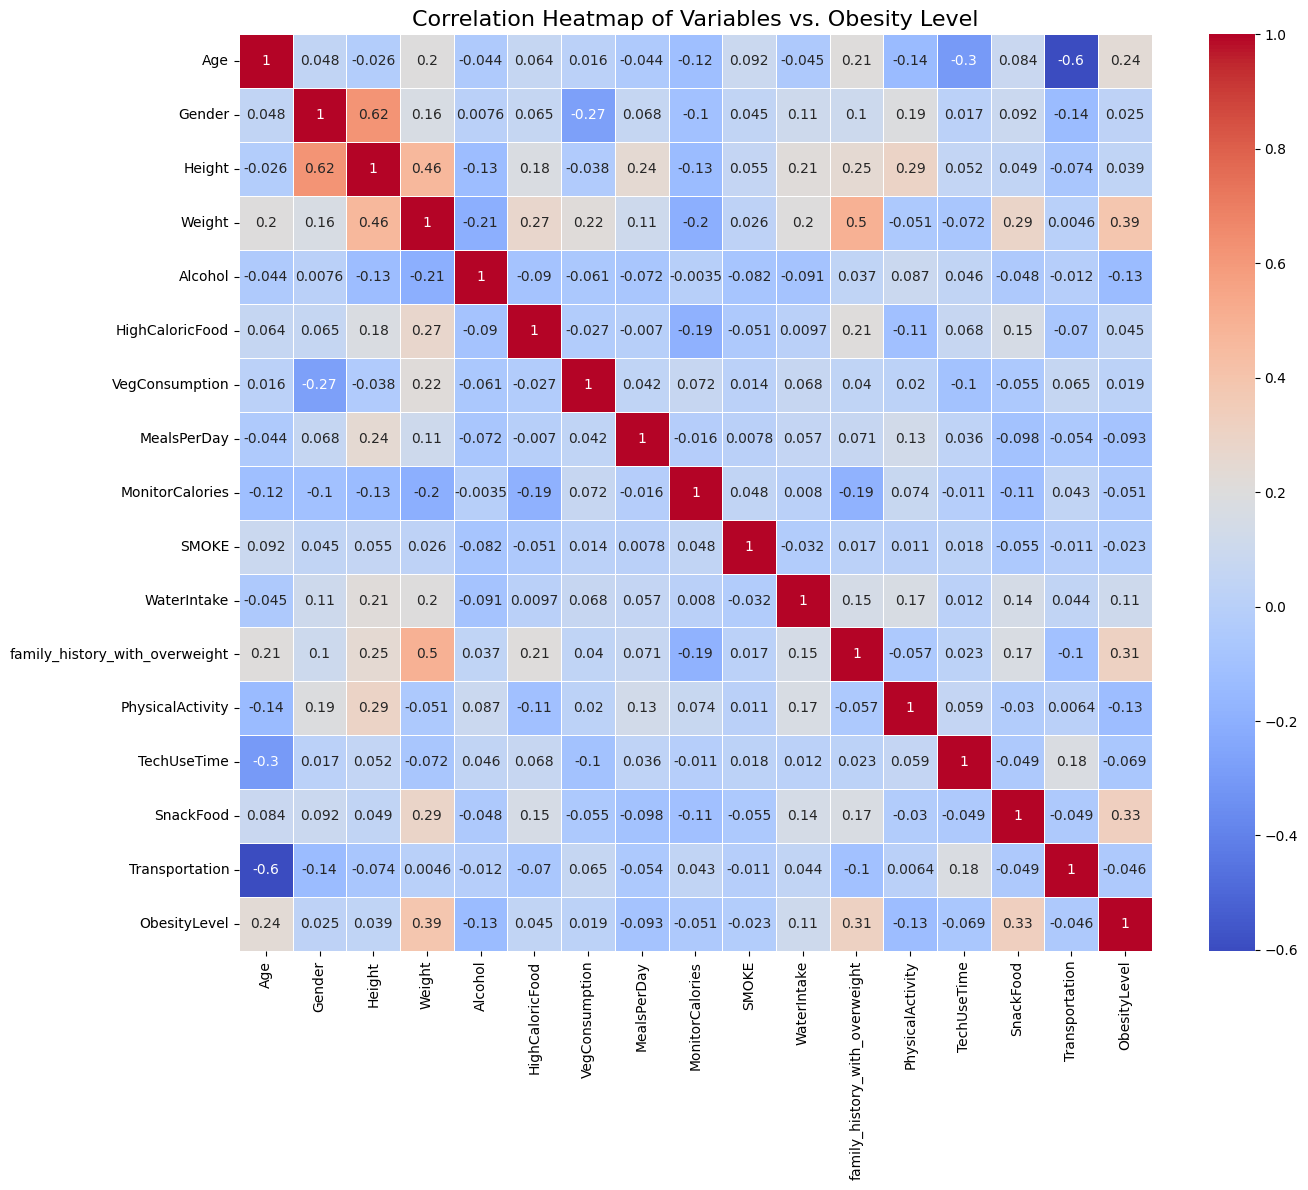

In [21]:
# CORRELATION HEATMAP
plt.figure(figsize=(14, 12))

# We use 'df_encoded' because correlation math fails on text
# We confirm we only use numbers
numeric_df = df_encoded.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Variables vs. Obesity Level', fontsize=16)
plt.tight_layout()
plt.show()